In [1]:
%fs
ls /FileStore/tables

path,name,size
dbfs:/FileStore/tables/c99temp_train_pseudo_snappy-76e66.parquet,c99temp_train_pseudo_snappy-76e66.parquet,37151588
dbfs:/FileStore/tables/c99temp_valid_pseudo_snappy-29080.parquet,c99temp_valid_pseudo_snappy-29080.parquet,13570913
dbfs:/FileStore/tables/model.h5,model.h5,316208
dbfs:/FileStore/tables/trainingset.csv,trainingset.csv,619685440


In [2]:
# Import data

import pandas as pd
import pyarrow.parquet as pq
train_data = pq.read_table('/dbfs/mnt/hackdata2019/c99temperature/c99temp_train_pseudo.snappy.parquet')
train_data = train_data.to_pandas()
# validaiton_data = pq.read_table('/dbfs/mnt/hackdata2019/c99temperature/c99temp_valid_pseudo.snappy.parquet')
# validaiton_data = validaiton_data.to_pandas()

In [3]:
# Get unique machines

machines = train_data['machineNumberPseudo'].unique()

In [4]:
# Get temp data at almost dead

train_data_died = train_data[train_data['remainingLifetime'] == 5]
train_data_died

Out[ 102 ]: 
 timestamp cpuType \
2123 2014-09-07 17:58:35.045 Intel(R) Celeron(R) M processor 1.50GHz 
2744 2015-01-09 17:59:17.690 INTEL Pentium III CPU 
3478 2014-05-18 06:55:51.221 INTEL Pentium III CPU 
4907 2011-01-21 15:59:32.183 INTEL Pentium III CPU 
4974 2015-06-17 09:55:39.458 Intel(R) Celeron(R) CPU G1620 @ 2.70GHz 
6491 2013-04-20 00:56:11.116 Intel(R) Celeron(R) M processor 1.50GHz 
7280 2015-11-27 23:58:20.926 INTEL Pentium III CPU 
8305 2015-02-13 19:58:03.722 INTEL Pentium III CPU 
8463 2014-10-10 08:11:53.357 INTEL Pentium III CPU 
8970 2013-04-17 13:59:06.821 INTEL Pentium III CPU 
9006 2013-10-16 17:57:44.419 Intel(R) Celeron(R) M processor 1.50GHz 
9109 2013-06-26 19:57:54.043 Intel(R) Celeron(R) M processor 1.50GHz 
10037 2013-02-13 17:59:14.662 INTEL Pentium III CPU 
10517 2015-12-02 13:58:11.050 Intel(R) Celeron(R) M processor 1.50GHz 
10865 2016-01-27 10:58:31.102 INTEL Pentium III CPU 
11219 2014-12-12 14:25:51.696 INTEL Pentium III CPU 
11634 2012-05-24 09:58:43.772 Intel(R) Celeron(R) M processor 1.50GHz 
11667 2012-05-24 06:58:05.837 Intel(R) Celeron(R) M processor 1.50GHz 
13085 2015-11-07 17:58:52.723 Intel(R) Celeron(R) CPU G1620 @ 2.70GHz 
14289 2014-06-25 18:58:04.792 Intel(R) Celeron(R) M processor 1.50GHz 
14372 2013-10-23 09:59:49.230 Intel(R) Celeron(R) M processor 1.50GHz 
14654 2013-07-17 14:55:02.671 Intel(R) Celeron(R) M processor 1.50GHz 
15138 2011-05-11 09:57:48.548 Intel(R) Celeron(R) M processor 1.50GHz 
15410 2014-07-16 08:55:10.593 INTEL Pentium III CPU 
17606 2015-06-10 02:55:16.124 INTEL Pentium III CPU 
17700 2015-02-21 09:56:01.858 INTEL Pentium III CPU 
17962 2014-04-23 16:55:47.155 INTEL Pentium III CPU 
18065 2016-02-18 18:56:28.140 INTEL Pentium III CPU 
19344 2012-02-08 19:59:22.289 INTEL Pentium III CPU 
19623 2014-08-30 01:56:35.873 Intel(R) Celeron(R) M processor 1.50GHz 
... ... ... 
1832461 2015-03-04 14:55:07.107 Intel(R) Celeron(R) M processor 1.50GHz 
1834774 2015-07-19 17:55:48.311 Intel(R) Celeron(R) M processor 1.50GHz 
1836983 2015-11-07 05:56:21.733 Intel(R) Celeron(R) CPU G1620 @ 2.70GHz 
1838228 2014-11-01 06:56:59.194 Intel(R) Celeron(R) M processor 1.50GHz 
1838472 2011-05-11 13:58:36.854 Intel(R) Celeron(R) M processor 1.50GHz 
1839136 2015-09-20 03:57:21.942 Intel(R) Celeron(R) M processor 1.50GHz 
1839244 2015-09-20 01:56:56.713 Intel(R) Celeron(R) M processor 1.50GHz 
1839643 2013-04-10 14:59:59.278 Intel(R) Celeron(R) M processor 1.50GHz 
1839964 2015-04-23 17:58:20.008 Intel(R) Celeron(R) M processor 1.50GHz 
1840015 2011-11-09 14:58:32.841 Intel(R) Celeron(R) M processor 1.50GHz 
1840100 2014-05-18 20:58:35.371 INTEL Pentium III CPU 
1840471 2013-11-13 07:54:33.818 INTEL Pentium III CPU 
1840768 2015-10-14 03:59:50.436 na 
1840865 2012-05-24 21:56:14.431 Intel(R) Celeron(R) M processor 1.50GHz 
1841053 2014-07-16 20:57:42.725 INTEL Pentium III CPU 
1841331 2015-07-29 14:59:41.307 Intel(R) Celeron(R) M processor 1.50GHz 
1841343 2015-07-29 21:59:03.917 Intel(R) Celeron(R) M processor 1.50GHz 
1841348 2014-04-11 01:57:50.638 Intel(R) Celeron(R) M processor 1.50GHz 
1841656 2015-05-21 07:59:27.202 Intel(R) Celeron(R) M processor 1.50GHz 
1841738 2015-09-04 00:55:49.568 INTEL Pentium III CPU 
1843874 2015-02-13 04:55:07.182 INTEL Pentium III CPU 
1845327 2014-08-15 13:57:36.041 Intel(R) Celeron(R) M processor 1.50GHz 
1845513 2015-06-17 11:56:03.065 Intel(R) Celeron(R) CPU G1620 @ 2.70GHz 
1846818 2015-07-15 23:59:24.903 Intel(R) Celeron(R) M processor 1.50GHz 
1848594 2016-02-17 03:55:52.639 Intel(R) Celeron(R) M processor 1.50GHz 
1849852 2015-11-28 20:58:09.777 Intel(R) Celeron(R) M processor 1.50GHz 
1849931 2013-11-13 05:59:33.815 INTEL Pentium III CPU 
1850625 2015-07-29 16:57:21.326 Intel(R) Celeron(R) M processor 1.50GHz 
1850787 2015-11-25 00:59:45.101 Intel(R) Celeron(R) M processor 1.50GHz 
1851036 2015-07-23 03:55:28.144 INTEL Pentium III CPU 

 cpuBoard tempBoardAK0 tempBoardSLAVE \
2123 886LCD-M/ATX 08_01_07 42.742000 41.000000 
2744 CB

In [5]:
train_data_died['cpuType'].unique()  

Out[ 13 ]: 
array(['Intel(R) Celeron(R) M processor 1.50GHz', 'INTEL Pentium III CPU',
 'Intel(R) Celeron(R) CPU G1620 @ 2.70GHz', 'INTEL Pentium II CPU',
 'na'], dtype=object)

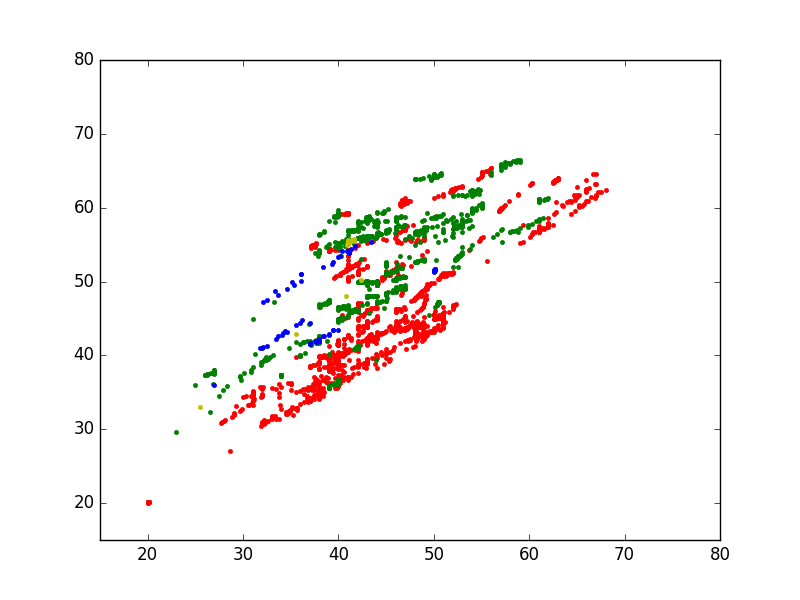

In [6]:
# Plot data from almos dead machines

cpu1 = train_data_died[train_data_died['cpuType'] == 'Intel(R) Celeron(R) M processor 1.50GHz']
x1 = cpu1['tempBoardSLAVE']
y1 = cpu1['tempBoardAK0']

cpu2 = train_data_died[train_data_died['cpuType'] == 'INTEL Pentium III CPU']
x2 = cpu2['tempBoardSLAVE']
y2 = cpu2['tempBoardAK0']

cpu3 = train_data_died[train_data_died['cpuType'] == 'Intel(R) Celeron(R) CPU G1620 @ 2.70GHz']
x3 = cpu3['tempBoardSLAVE']
y3 = cpu3['tempBoardAK0']

cpu4 = train_data_died[train_data_died['cpuType'] == 'INTEL Pentium II CPU']
x4 = cpu4['tempBoardSLAVE']
y4 = cpu4['tempBoardAK0']

fig, ax = plt.subplots()
ax.plot(x1, y1, 'r.', x2, y2, 'g.', x3, y3, 'b.', x4, y4, 'y.')

ax.set_xlim(15, 80)
ax.set_ylim(15, 80)
display(fig)

In [7]:
# drop lines with temperature value of -99

train_data = train_data[train_data['tempBoardAK0'] > 0]
train_data = train_data[train_data['tempBoardSLAVE'] > 0]  
train_data.sort_values(by=['timestamp'])

Out[ 4 ]: 
 timestamp cpuType \
576600 2011-01-03 00:23:16.032 Intel(R) Celeron(R) M processor 1.50GHz 
586944 2011-01-03 00:51:02.924 INTEL Pentium III CPU 
554824 2011-01-03 00:57:23.493 INTEL Pentium III CPU 
189670 2011-01-03 00:57:40.056 INTEL Pentium II CPU 
329313 2011-01-03 00:57:45.684 Intel(R) Celeron(R) M processor 1.50GHz 
683814 2011-01-03 00:58:41.880 INTEL Pentium III CPU 
87827 2011-01-03 00:58:51.812 INTEL Pentium III CPU 
275582 2011-01-03 01:56:59.969 INTEL Pentium III CPU 
855948 2011-01-03 01:57:57.746 Intel(R) Celeron(R) M processor 1.50GHz 
830939 2011-01-03 01:59:04.232 INTEL Pentium III CPU 
983647 2011-01-03 02:57:12.099 INTEL Pentium III CPU 
1136220 2011-01-03 02:58:09.808 Intel(R) Celeron(R) M processor 1.50GHz 
517551 2011-01-03 02:59:16.654 INTEL Pentium III CPU 
1128083 2011-01-03 03:57:24.233 INTEL Pentium III CPU 
1079909 2011-01-03 03:58:21.872 Intel(R) Celeron(R) M processor 1.50GHz 
941718 2011-01-03 03:59:29.074 INTEL Pentium III CPU 
475425 2011-01-03 04:57:36.367 INTEL Pentium III CPU 
1257768 2011-01-03 04:58:33.931 Intel(R) Celeron(R) M processor 1.50GHz 
1185343 2011-01-03 04:59:41.492 INTEL Pentium III CPU 
446563 2011-01-03 05:46:52.969 Intel(R) Celeron(R) M processor 1.50GHz 
1168126 2011-01-03 05:57:48.501 INTEL Pentium III CPU 
1034637 2011-01-03 05:58:45.997 Intel(R) Celeron(R) M processor 1.50GHz 
1449157 2011-01-03 05:59:53.915 INTEL Pentium III CPU 
502957 2011-01-03 06:22:00.333 Intel(R) Celeron(R) M processor 1.50GHz 
452683 2011-01-03 06:55:05.299 INTEL Pentium III CPU 
146609 2011-01-03 06:58:00.639 INTEL Pentium III CPU 
127768 2011-01-03 06:58:58.135 Intel(R) Celeron(R) M processor 1.50GHz 
469070 2011-01-03 06:59:51.856 INTEL Pentium III CPU 
1573148 2011-01-03 07:02:08.744 Intel(R) Celeron(R) M processor 1.50GHz 
402262 2011-01-03 07:55:03.004 INTEL Pentium III CPU 
... ... ... 
663251 2016-06-25 23:56:04.718 Intel(R) Celeron(R) M processor 1.50GHz 
546729 2016-06-25 23:56:07.191 INTEL Pentium III CPU 
576189 2016-06-25 23:56:11.105 Intel(R) Celeron(R) M processor 1.50GHz 
218848 2016-06-25 23:56:21.955 INTEL Pentium III CPU 
946012 2016-06-25 23:56:27.245 Intel(R) Celeron(R) M processor 1.50GHz 
754333 2016-06-25 23:56:28.346 INTEL Pentium III CPU 
1091830 2016-06-25 23:56:38.928 INTEL Pentium III CPU 
1491389 2016-06-25 23:56:45.204 Intel(R) Celeron(R) M processor 1.50GHz 
1789863 2016-06-25 23:56:46.771 Intel(R) Celeron(R) M processor 1.50GHz 
1380592 2016-06-25 23:56:58.962 INTEL Pentium III CPU 
811159 2016-06-25 23:56:59.834 Intel(R) Celeron(R) M processor 1.50GHz 
1464958 2016-06-25 23:57:30.045 Intel(R) Celeron(R) M processor 1.50GHz 
875295 2016-06-25 23:57:30.366 INTEL Pentium III CPU 
322811 2016-06-25 23:57:34.301 Intel(R) Celeron(R) M processor 1.50GHz 
1400880 2016-06-25 23:58:01.711 Intel(R) Celeron(R) M processor 1.50GHz 
404840 2016-06-25 23:58:03.841 INTEL Pentium III CPU 
735971 2016-06-25 23:58:10.773 INTEL Pentium III CPU 
599145 2016-06-25 23:58:12.891 INTEL Pentium II CPU 
11528 2016-06-25 23:58:16.670 INTEL Pentium III CPU 
574563 2016-06-25 23:58:26.398 INTEL Pentium III CPU 
123462 2016-06-25 23:58:45.065 INTEL Pentium III CPU 
547603 2016-06-25 23:58:55.500 INTEL Pentium III CPU 
1838001 2016-06-25 23:59:24.700 Intel(R) Celeron(R) M processor 1.50GHz 
1119005 2016-06-25 23:59:34.101 Intel(R) Celeron(R) M processor 1.50GHz 
1500401 2016-06-25 23:59:35.825 INTEL Pentium III CPU 
1619119 2016-06-25 23:59:40.637 INTEL Pentium III CPU 
1010659 2016-06-25 23:59:40.735 Intel(R) Celeron(R) M processor 1.50GHz 
444961 2016-06-25 23:59:52.514 Intel(R) Celeron(R) M processor 1.50GHz 
1615475 2016-06-26 00:01:50.656 Intel(R) Celeron(R) M processor 1.50GHz 
856635 2016-06-26 00:13:08.882 Intel(R) Celeron(R) CPU G1620 @ 2.70GHz 

 cpuBoard tempBoardAK0 tempBoardSLAVE \
576600 886LCD-M/ATX 08_01_07 35.730833 37.000000 
586944 CB60-BX/C 09_11_02 56.052727 46.000000 
554824 CB60-BX/C 09_11_02 53.658333 41.250000 
189670 P2B1012 03_03_00 46.505833 40.833333 


In [8]:
# add feature series for statisticals

for machine in machines:
  mask = train_data['machineNumberPseudo'] == machine
  machine_frame = train_data[mask]
  
  subframe = pd.DataFrame(columns=['mean', 'max', 'min', 'std'])

  subframe['mean'] = machine_frame['tempBoardAK0'].rolling(window=20).mean()
  subframe['max'] = machine_frame['tempBoardAK0'].rolling(window=20).max()
  subframe['min'] = machine_frame['tempBoardAK0'].rolling(window=20).min()
  subframe['std'] = machine_frame['tempBoardAK0'].rolling(window=20).std()
  
  train_data = pd.concat([train_data, subframe], axis=1, join_axes=[train_data.index])

In [9]:
train_data

In [10]:
# Limit the remaining lifetime to 30 days to reduce overfitting

train_data.at[train_data['remainingLifetime'] > 30, 'remainingLifetime'] = 30

In [11]:
# Add categorized cpuType

dummies = pd.get_dummies(train_data['cpuType'])
train_data = pd.concat([train_data, dummies], axis=1, join_axes=[train_data.index])

In [12]:
# Add categorized cpuBoard

dummies = pd.get_dummies(train_data['cpuBoard'])
train_data = pd.concat([train_data, dummies], axis=1, join_axes=[train_data.index])

In [13]:
# Drop not further needed columns

train_data = train_data.drop(labels=['timestamp', 'cpuType', 'cpuBoard', 'tempBoardAK0', 'tempBoardSLAVE', 'machineNumberPseudo'], axis=1)

In [14]:
# Drop lines with NaN values (too few data for rolling window)

train_data = train_data.dropna()

In [15]:
train_data

Out[ 99 ]: 
 remainingLifetime mean max min std \
19 30 40.189614 49.816000 33.677778 4.554989 
20 30 39.742295 49.816000 33.677778 4.478919 
21 30 39.856866 49.816000 33.677778 4.458458 
22 30 39.782585 49.816000 33.677778 4.384622 
23 30 39.903418 49.816000 33.677778 4.301211 
24 30 40.029779 49.816000 35.861429 4.142897 
25 30 39.470408 49.473750 35.861429 3.449208 
26 30 39.514122 49.473750 35.861429 3.506693 
27 30 39.778783 49.473750 35.861429 3.663997 
28 30 40.079170 49.473750 35.861429 3.785489 
29 30 40.013456 49.473750 35.861429 3.826729 
30 30 40.607742 49.473750 35.861429 4.299934 
31 30 40.376617 49.473750 35.861429 4.247758 
32 30 40.270788 49.473750 35.861429 4.314718 
33 30 40.573300 49.473750 35.861429 4.256353 
34 30 40.600014 49.473750 36.120000 4.226797 
35 30 40.401493 49.327143 36.120000 3.865921 
36 30 40.403779 49.327143 36.120000 3.864649 
37 30 40.378779 49.327143 36.120000 3.881111 
38 30 40.491369 49.327143 36.120000 3.989367 
39 30 40.830536 49.327143 36.205000 3.885154 
40 30 41.091911 49.327143 36.205000 3.731639 
41 30 40.702768 49.327143 32.404286 4.206542 
42 30 40.450994 49.327143 32.404286 4.196606 
43 30 40.586373 49.327143 32.404286 4.163827 
44 30 40.980248 49.327143 32.404286 4.099649 
45 30 41.391632 49.327143 32.404286 4.260884 
46 30 41.341168 49.327143 32.404286 4.230817 
47 30 41.367343 49.327143 32.404286 4.251768 
48 30 41.280714 49.327143 32.404286 4.204890 
... ... ... ... ... ... 
1851082 30 42.335756 45.940000 35.248333 2.261794 
1851083 30 42.263756 45.940000 35.248333 2.226275 
1851084 30 42.224863 45.940000 35.248333 2.226479 
1851085 30 42.253926 45.940000 35.248333 2.226771 
1851086 30 42.620866 45.940000 38.978571 1.496513 
1851087 30 42.657080 45.940000 38.978571 1.492476 
1851088 30 42.627378 45.940000 38.978571 1.523238 
1851089 30 42.505065 45.940000 38.978571 1.424920 
1851090 30 42.499637 45.940000 38.978571 1.428831 
1851091 30 42.440346 45.940000 38.978571 1.422955 
1851092 30 42.303204 43.966250 38.978571 1.179211 
1851093 30 42.288442 43.966250 38.978571 1.199914 
1851094 30 42.659846 46.406667 40.563333 1.269102 
1851095 4 42.982805 48.214167 40.563333 1.755405 
1851096 30 43.047367 48.214167 40.563333 1.807921 
1851097 30 43.069763 48.214167 40.563333 1.822618 
1851098 30 43.022817 48.214167 40.563333 1.844029 
1851099 30 43.192007 48.214167 40.563333 1.933820 
1851100 30 43.190281 48.214167 40.563333 1.934972 
1851101 30 43.111406 48.214167 40.563333 1.950021 
1851102 30 43.169406 48.214167 40.563333 1.983303 
1851103 30 43.290168 48.214167 40.563333 2.021975 
1851104 30 43.446391 48.214167 40.563333 2.025083 
1851105 30 43.644245 48.214167 40.563333 2.123918 
1851106 17 43.821680 48.214167 40.563333 2.178489 
1851107 30 43.920412 48.214167 40.563333 2.176538 
1851108 30 44.163870 48.214167 40.563333 2.086867 
1851109 30 44.218308 48.214167 40.563333 2.054268 
1851110 30 44.252820 48.214167 40.563333 2.011034 
1851111 13 44.397211 48.214167 40.563333 1.944187 

 Celeron(R) Dual-Core CPU T3100 @ 1.90GHz INTEL Pentium II CPU \
19 0 0 
20 0 0 
21 0 0 
22 0 0 
23 0 0 
24 0 0 
25 0 0 
26 0 0 
27 0 0 
28 0 0 
29 0 0 
30 0 0 
31 0 0 
32 0 0 
33 0 0 
34 0 0 
35 0 0 
36 0 0 
37 0 0 
38 0 0 
39 0 0 
40 0 0 
41 0 0 
42 0 0 
43 0 0 
44 0 0 
45 0 0 
46 0 0 
47 0 0 
48 0 0 
... ... ... 
1851082 0 0 
1851083 0 0 
1851084 0 0 
1851085 0 0 
1851086 0 0 
1851087 0 0 
1851088 0 0 
1851089 0 0 
1851090 0 0 
1851091 0 0 
1851092 0 0 
1851093 0 0 
1851094 0 0 
1851095 0 0 
1851096 0 0 
1851097 0 0 
1851098 0 0 
1851099 0 0 
1851100 0 0 
1851101 0 0 
1851102 0 0 
1851103 0 0 
1851104 0 0 
1851105 0 0 
1851106 0 0 
1851107 0 0 
1851108 0 0 
1851109 0 0 
1851110 0 0 
1851111 0 0 

 INTEL Pentium III CPU Intel(R) Celeron(R) CPU G1620 @ 2.70GHz \
19 0 0 
20 0 0 
21 0 0 
22 0 0 
23 0 0 
24 0 0 
25 0 0 
26 0 0 
27 0 0 
28 0 0 
29 0 0 
30 0 0 
31 0 0 
32 0 0 
33 0 0 
34 0 0 
35 0 0 
36 0 0 
37 0 0 
38 0 0 
39 0 0 
40 0 0 
41 0 0 
42 0 0 
43 0 0 
44 0 0 
45 0 0 
46 0 0 
47 0 0 
48 0 0 
.